In [1]:
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('../')

In [2]:
%load_ext autoreload
%autoreload 2
from lbxs4.simulations import LBSky
from lbxs4.simulations import S4Sky
import lbxs4.utils as utils
from lbxs4.config import DATDIR
from lbxs4.filtering import FiltCoadd

In [3]:
dire = '/pscratch/sd/l/lonappan/LBxS4'

In [4]:
lblib = LBSky(512)
s4lib = S4Sky(1024)

In [5]:
lbemap = hp.alm2map(lblib.NILC_Elm(0),512)

In [11]:
s4emap = hp.alm2map(s4lib.NILC_Elm(0),512)

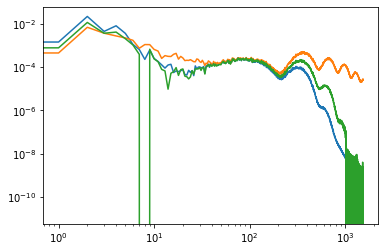

In [13]:
plt.loglog(hp.anafast(lbemap*hp.ud_grade(s4lib.mask,512)))
plt.loglog(hp.anafast(s4emap))
plt.loglog(hp.anafast(lbemap*hp.ud_grade(s4lib.mask,512),s4emap))

In [ ]:
plt.loglog(hp.alm2cl(lblib.NILC_Elm(0))

# LiteBIRD only E-mode filtering

In [5]:
import time

In [5]:
fc_lb = FiltCoadd(dire,lblib=lblib) #3min

INFO:LiteBIRD simulation library is loaded


In [ ]:
for i in range(2,20):
    fc_lb.filtEmode(i,status='stat.txt')

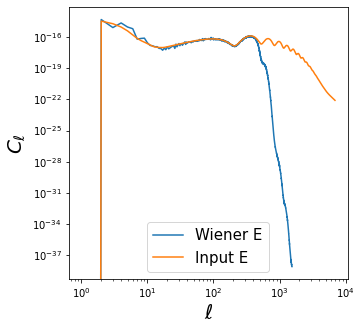

In [9]:
now = time.time()
fc_lb.filtEmode(0,status='stat.txt')
fc_lb.plot_W_E(0)
np.savetxt('lb.txt',np.array([time.time()-now]),fmt='%.2f')

# CMB-S4 only E-mode filtering

In [7]:
fc_s4 = FiltCoadd(dire,s4lib=s4lib)

INFO:CMB-S4 simulation library is loaded


In [ ]:
now = time.time()
fc_s4.filtEmode(0,status='stat.txt')
fc_s4.plot_W_E(0,ymin=1e-20,lmax=3096)
np.savetxt('s4.txt',np.array([time.time()-now]),fmt='%.2f')

# LiteBIRD and CMB-S4 E-mode coadding and filtering

In [8]:
fc_lbxs4 = FiltCoadd(dire,lblib=lblib,s4lib=s4lib,coadd=True)

INFO:LiteBIRD simulation library is loaded
INFO:CMB-S4 simulation library is loaded
INFO:Coaddition is enabled


In [ ]:
now = time.time()
fc_lbxs4.filtEmode(0,status='stat.txt')
fc_lbxs4.plot_W_E(0,lmax=3096,)
np.savetxt('lbs4.txt',np.array([time.time()-now]),fmt='%.2f')